# Notebook 3: Correlation Analysis of Milling Process Data

In the previous notebook, we applied a **low-pass Butterworth filter** to remove high-frequency noise from the signals.

---

### Additional Preprocessing (done outside of the notebooks):

To prepare the data for analysis, the following steps were completed **outside of this notebook** (e.g. via preprocessing scripts):

- **Non-cutting sections**, where the tool was not engaged with the workpiece were removed.  
  This segmentation was based on the **engagement width**, which was determined using **cutting simulations**.
  
- Signal values below **0.1** were filtered out to exclude irrelevant low-activity regions.

- All cleaned and segmented trials were then **concatenated into a single dataset** containing only cutting data.

The resulting dataset represents **filtered, relevant signal sections** across multiple experiments.

---

### Goal of this Notebook:

In this notebook, we will perform a **correlation analysis** to:

- Explore relationships between different physical signals (currents, forces, positions, etc.)
- Understand how different features correlate with the **spindle current** and **tool load**
- Identify redundant or highly correlated signals

## First Look at the Concatenated Spindle Current Signal

Before we dive into correlation analysis, we start by plotting the **filtered and segmented spindle current signal (`ACT_CURRENT_S`)** from the combined dataset.

---

### Interpretation:

- The signal shown includes **only active cutting phases**, filtered and segmented across all experiments.
- You will notice that the **amplitude of the spindle current varies significantly** from one segment to another.
- This variation is expected:  
  > Tools with **larger diameters** require significantly **higher spindle currents** due to increased cutting load.

Such amplitude differences reflect the diversity in tool geometry and process settings.

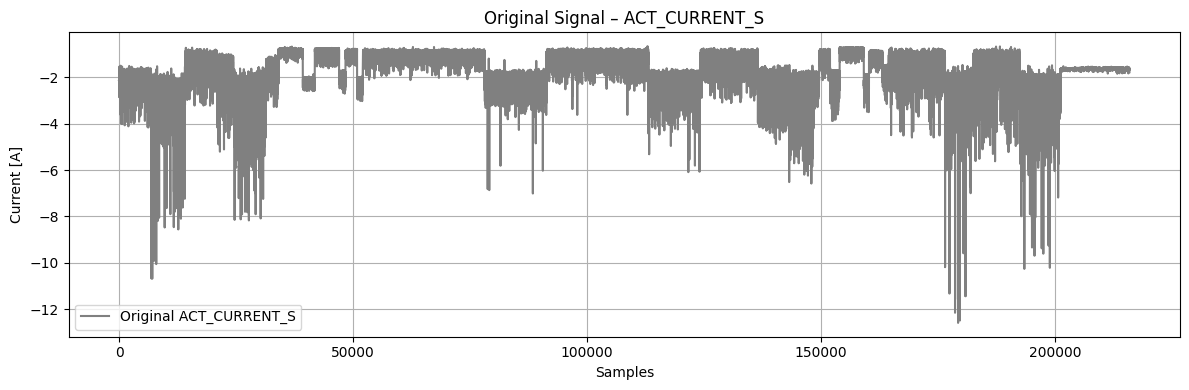

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Rough_Train_New.csv")

# Plot: Spindle current
plt.figure(figsize=(12, 4))
plt.plot(df['ACT_CURRENT_S'], color='gray', label='Original ACT_CURRENT_S')
plt.title('ACT_CURRENT_S')
plt.xlabel('Samples')
plt.ylabel('Current [A]')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



## Exercise: Correlation Analysis of Milling Process Features

You are now provided with a pre-processed dataset that contains **only filtered and segmented cutting data** from multiple milling experiments.  
The goal of this task is to perform a **correlation analysis** to explore the relationships between key physical signals and process parameters.

---

### What You Should Do:

1. **Select the following features** from the dataset using the list provided below.
2. **Compute the Pearson correlation matrix** using `.corr(method='pearson')`.  
   - The **Pearson correlation coefficient** measures the **linear relationship** between pairs of variables.
3. **Visualize the correlation matrix** as a heatmap using `seaborn.heatmap()`.

---

### Provided Feature List

Use the following list of features for your analysis:

### Feature Descriptions

| Feature           | Description                                                               |
|-------------------|---------------------------------------------------------------------------|
| ACT_CURRENT_S     | Spindle current (main spindle motor)                                      |
| ACT_CURRENT_X/Y/Z | Axis drive currents for X, Y, and Z axes                                  |
| Fx_N, Fy_N, Fz_N  | Cutting forces in X, Y, Z directions (in Newtons)                         |
| F_xyz             | Combined resultant cutting force: √(Fx² + Fy² + Fz²)                      |
| ae                | Radial depth of cut (engagement width)                                    |
| ap                | Axial depth of cut (engagement height / depth)                            |
| Qw                | Material removal rate (MRR)                                               |
| Feed_Rate         | Tool feed rate (in mm/min)                                                |
| Feed_per_Tooth    | Feed per tooth (Feed_Rate / (n_teeth × spindle speed))                    |
| SPINDLE_SPEED     | Spindle rotational speed in revolutions per minute (RPM)                  |
| Cutting_Speed     | Cutting speed at the tool circumference (dependent on diameter & RPM)     |


```python
columns_of_interest = [
    'ACT_CURRENT_S', 'ACT_CURRENT_X', 'ACT_CURRENT_Y', 'ACT_CURRENT_Z',
    'Fx_N', 'Fy_N', 'Fz_N', 'F_xyz',
    'ae', 'ap', 'Qw', 'Feed_Rate', 'Feed_per_Tooth', 'SPINDLE_SPEED', 'Cutting_Speed'
]




In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns